# ПРОЕКТ: Выбор локации для скважины

Я работаю в нефтедобывающей компании «ГлавРосГосНефть». \
Мне предоставлены данные о пробах нефти в трёх регионах и характеристики для каждой скважины.

**Цель проекта**: выбрать локацию, для бурения новой скважины. 
1. Построить модель для определения региона, где добыча принесёт наибольшую прибыль.
2. Проанализировать возможную прибыль и риски техникой Bootstrap.

Ход исследования:

Шаг 1 - Загрузка и подготовка данных;\
Шаг 2 - Обучение и проверка моделей для каждого региона;\
Шаг 3 - Подготовка к расчету прибыли;\
Шаг 4 - Написание функции для расчёта прибыли по выбранным скважинам и предсказаниям модели;\
Шаг 5 - Расчет рисков и прибыли для каждого региона;

Итоговый вывод.

## Шаг 1. Загрузка и подготовка данных

In [1]:
# импоритруем pandas для обработки, анализа и структурирования данных
import pandas as pd 

# импоритруем numpy для работы с данными
import numpy as np 

# так же импоритруем matplotlib.pyplot для будущего построения графиков
import matplotlib.pyplot as plt 

# так же импоритруем seaborn для построения графиков
import seaborn as sns 

# Импортируем функцию для разделения датасета на выборки
from sklearn.model_selection import train_test_split

# Импортируем классы для кодирования 
from sklearn.preprocessing import StandardScaler 

# Подключаем модель линейной регрессии
from sklearn.linear_model import LinearRegression

# Подключаем метрику MSE.
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

### 1.1 Загрузим данные из csv-файлов в датафреймы c помощью библиотеки pandas

In [2]:
try: # открываем наши файлы с данными в среде JupiterHUB:
    data_zero = pd.read_csv('/datasets/geo_data_0.csv') # данные геологоразведки первого региона
    data_one = pd.read_csv('/datasets/geo_data_1.csv') # данные геологоразведки второго региона
    data_two = pd.read_csv('/datasets/geo_data_2.csv') # данные геологоразведки третьего региона
    
except: # либо берем данные на ПК для локальной версии Jupiter:
    data_zero = pd.read_csv('C://Users//Voova//datasets//geo_data_0.csv') 
    data_one = pd.read_csv('C://Users//Voova//datasets//geo_data_1.csv')
    data_two = pd.read_csv('C://Users//Voova//datasets//geo_data_2.csv')

Описание данных:\
**Признаки**
- **id** — уникальный идентификатор скважины;
- **f0, f1, f2** — три признака точек (неизвестно, что они означают, но сами признаки значимы);


**Целевой признак**
- **product** — объём запасов в скважине, тыс. баррелей.

### 1.2 Изучим общую информацию о датафреймах. Выведим первые строки наборов данных.

1.2.1 Посмотрим датафрейм `data_zero`:

In [3]:
data_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Перед нами датафрейм на **5** колонок и **100000** строк. Пропущенные значения не обнаружены. \
Посмотрим первые 5 строчек таблицы:

In [4]:
data_zero.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Типы данных корректные, данные в таблице соответствуют описанию.

1.2.2 Посмотрим датафрейм `data_one`:

In [5]:
data_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Перед нами датафрейм на **5** колонок и **100000** строк. Пропущенные значения не обнаружены. \
Посмотрим первые 5 строчек таблицы:

In [6]:
data_one.head(5)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Типы данных корректные, данные в таблице соответствуют описанию.

1.2.3 Посмотрим датафрейм `data_two`:

In [7]:
data_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Перед нами датафрейм на **5** колонок и **100000** строк. Пропущенные значения не обнаружены. \
Посмотрим первые 5 строчек таблицы:

In [8]:
data_two.head(5)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Типы данных корректные, данные в таблице соответствуют описанию.

### Вывод:
В нашем распоряжении датафреймы:
- `data_zero` на **5** колонок и **100000** строк;
- `data_one` на **5** колонок и **100000** строк;
- `data_two` на **5** колонки и **100000** строк.
  
Пропуски в данных не обнаружены.

Так как данные синтетические, я подразумеваю, что разный регистр символов в столбце ID так и задуман, в плане того, что он влияет на уникальный идентификатор скважины и к нижнему регистру приводить этот столбец я не буду. 

Для корректного исследования необходимо предобработать данные, а именно:
- Проверить датафреймы на явные/неявные дубликаты.

### 1.3 Предобработка данных

Основа предобработки данных - проверка датафреймов на дубликаты:

1.3.1 Работаем с датафреймом `data_zero`:

In [9]:
data_zero.duplicated().sum() # выведим сумму явных дубликатов:

0

Явные дубликаты не обнаружены. 

Проверим на неявные дубликаты столбец с категориальными данными `['id']`:

In [10]:
data_zero.duplicated(subset = ['id']).sum() 

10

10 скважен дублируются, посмотрим на них:

In [11]:
data_zero[data_zero.duplicated(subset = ['id'])]

,id,f0,f1,f2,product
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
66136,74z30,1.084962,-0.312358,6.990771,127.643327
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
75715,Tdehs,0.112079,0.430296,3.218993,60.964018
90815,fiKDv,0.049883,0.841313,6.394613,137.346586
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008
97785,bsk9y,0.378429,0.005837,0.160827,160.637302


In [12]:
data_zero[data_zero['id'] == 'HZww2']

,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695


У скважин совпадает только идентификатор, а признаки точек и объемы запасов различаются: ведь можно из одной скважины на поверхности забуриваться в разные направления, что логично. \
Поэтому я считаю, что эти дубликаты не стоит удалять, тем более что их количество от общего числа скважин несущественно. 

1.3.2 Работаем с датафреймом `data_one`:

In [13]:
data_one.duplicated().sum() # выведим сумму явных дубликатов:

0

Явные дубликаты не обнаружены. 

Проверим на неявные дубликаты столбец с категориальными данными `['id']`:

In [14]:
data_one.duplicated(subset = ['id']).sum() 

4

4 скважины дублируются, посмотрим на них:

In [15]:
data_one[data_one.duplicated(subset = ['id'])]

,id,f0,f1,f2,product
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


In [16]:
data_one[data_one['id'] == 'LHZR0']

,id,f0,f1,f2,product
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625


По дублям этого датафрейма делаем точно такие же выводы, как и по предыдущему. 

1.3.3 Работаем с датафреймом `data_two`:

In [17]:
data_two.duplicated().sum() # выведим сумму явных дубликатов:

0

Явные дубликаты не обнаружены. 

Проверим на неявные дубликаты столбец с категориальными данными `['id']`:

In [18]:
data_two.duplicated(subset = ['id']).sum() 

4

4 скважины дублируются, посмотрим на них:

In [19]:
data_two[data_two.duplicated(subset = ['id'])]

,id,f0,f1,f2,product
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


In [20]:
data_two[data_two['id'] == 'xCHr8']

,id,f0,f1,f2,product
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


По дублям этого датафрейма делаем точно такие же выводы, как и по предыдущему. 

### Вывод:
На этапе предобработки данных мы не выявили явных дубликатов, однако были замечены одни и те же скважины с различными признаками точек. 
Принято решение не избавляться от этих данных, так как они обезличенны и их количество очень мало.

### 1.4 Исследовательский анализ данных

1.4.1 Работаем с датафреймом `data_zero`:

1. Вызовем описательную функцию для трех признаков точек скважин:

In [21]:
print(data_zero['f0'].describe())
print(data_zero['f1'].describe())
data_zero['f2'].describe()

count    100000.000000
mean          0.500419
std           0.871832
min          -1.408605
25%          -0.072580
50%           0.502360
75%           1.073581
max           2.362331
Name: f0, dtype: float64
count    100000.000000
mean          0.250143
std           0.504433
min          -0.848218
25%          -0.200881
50%           0.250252
75%           0.700646
max           1.343769
Name: f1, dtype: float64


count    100000.000000
mean          2.502647
std           3.248248
min         -12.088328
25%           0.287748
50%           2.515969
75%           4.715088
max          16.003790
Name: f2, dtype: float64

Аномальных значений не обнаружено, данные, как будто уже отмасштабированы, разве что бросаются в глаза максимальные и минимальные значения третьей точки:

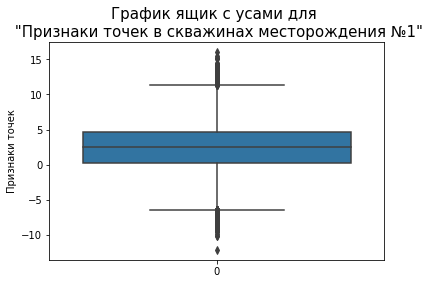

In [22]:
sns.boxplot(data = data_zero['f2'])
plt.title('График ящик с усами для \n "Признаки точек в скважинах месторождения №1"', size = 15)
plt.ylabel('Признаки точек', size = 10)
plt.show()

Так как мы понятия не имеем, что означают эти признаки, то и выводов особо никаких сделать не можем, кроме того, что выбросы присустствуют и они окажут своё влияние при моделировании. 

2. Вызовем описательную функцию для `product`:

In [23]:
data_zero['product'].describe()

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

Для оценки выбросов построим боксплот:

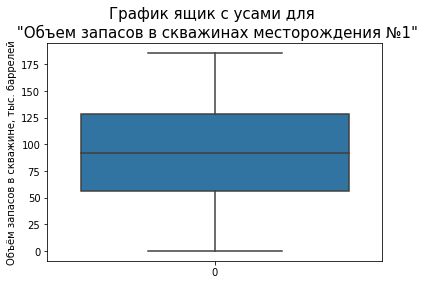

In [24]:
sns.boxplot(data = data_zero['product'])
plt.title('График ящик с усами для \n "Объем запасов в скважинах месторождения №1"', size = 15)
plt.ylabel('Объём запасов в скважине, тыс. баррелей', size = 10)
plt.show()

Аномальных значений не обнаружено.\
Построим гистограмму распределения объёма запасов в скважинах первого месторождения:

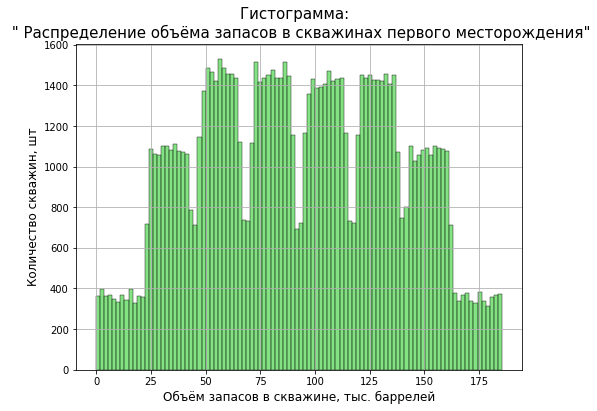

In [25]:
plt.figure(figsize = (8, 6))
sns.histplot(data_zero, bins = 100,  
             x = 'product',
             color = 'limegreen', 
             alpha = 0.6)
plt.title('Гистограмма:  \n " Распределение объёма запасов в скважинах первого месторождения"', size = 15)
plt.xlabel('Объём запасов в скважине, тыс. баррелей', size = 12)
plt.ylabel('Количество скважин, шт', size = 12)
plt.grid(True)
plt.show()

Из гистограммы выше видно, что распределение похоже на "многомодальное", однако, если сократить количество `корзин`, то форма распределения принимает почти "нормальный" вид. Так же из описательной функции мы видим, что встречаются пустые скважины с объемом равным нулю, а так же средний объем запасов составляет **92,5 тыс.** баррелей нефти на скважину.

 Рассчитаем коэффициенты корреляции между всеми признаками:

In [26]:
# Так как столбец ID напрямую коррелирует с объемом запасов в скважине - сделаем его индексом, чтобы видеть в будущем какие скважины
# могут быть нам более интересными
data_zero = data_zero.set_index('id')

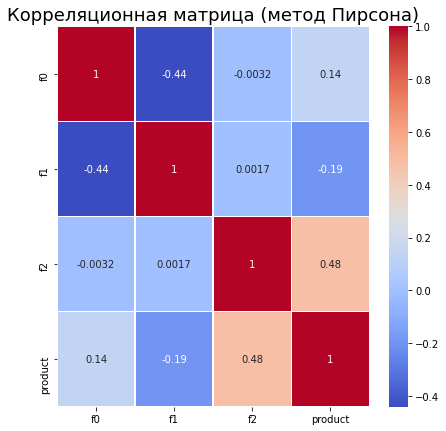

In [27]:
# Для наглядности используем ХитМэп:
df_corr_martix = data_zero.corr()
plt.figure(figsize = (7, 7))
sns.heatmap(df_corr_martix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Корреляционная матрица (метод Пирсона)', fontsize = 18)
plt.show()

Наблюдается *умеренная положительная* корреляция между **объемом запасов** и **третьим признаком** точек **0,48**. \
А так же *слабая положительная* корреляция между **объемом запасов** и **первым признаком** точек **0,14**.\
Как и *слабая отрицательная* корреляция между **объемом запасов** и **вторым признаком** точек **-0,19**.

Сами же признаки между собой почти не коррелируют, если не считать *умеренную отрицательную* корреляция между **первым** и **вторым признаком** точек **-0,44**.

1.4.2 Работаем с датафреймом `data_one`:

1. Вызовем описательную функцию для трех признаков точек скважин:

In [28]:
print(data_one['f0'].describe())
print(data_one['f1'].describe())
data_one['f2'].describe()

count    100000.000000
mean          1.141296
std           8.965932
min         -31.609576
25%          -6.298551
50%           1.153055
75%           8.621015
max          29.421755
Name: f0, dtype: float64
count    100000.000000
mean         -4.796579
std           5.119872
min         -26.358598
25%          -8.267985
50%          -4.813172
75%          -1.332816
max          18.734063
Name: f1, dtype: float64


count    100000.000000
mean          2.494541
std           1.703572
min          -0.018144
25%           1.000021
50%           2.011479
75%           3.999904
max           5.019721
Name: f2, dtype: float64

Аномальных значений не обнаружено, данные аналогичны первому датафрейму.

2. Вызовем описательную функцию для `product`:

In [29]:
data_one['product'].describe()

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

Для оценки выбросов построим боксплот:

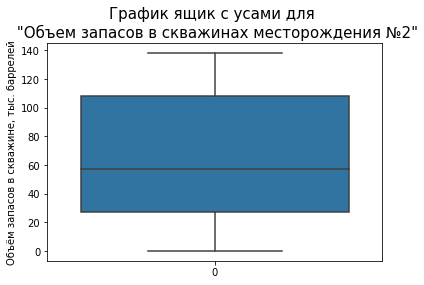

In [30]:
sns.boxplot(data = data_one['product'])
plt.title('График ящик с усами для \n "Объем запасов в скважинах месторождения №2"', size = 15)
plt.ylabel('Объём запасов в скважине, тыс. баррелей', size = 10)
plt.show()

Аномальных значений не обнаружено.\
Построим гистограмму распределения объёма запасов в скважинах второго месторождения:

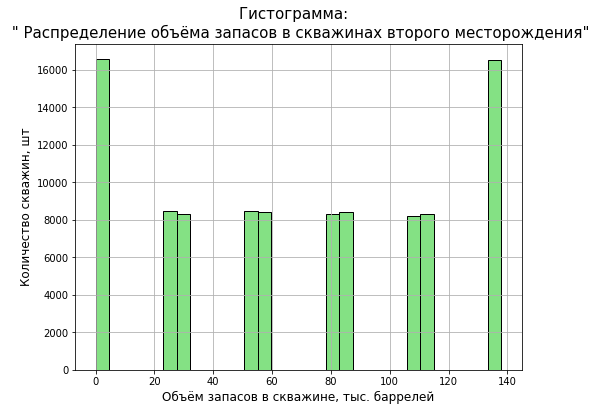

In [31]:
plt.figure(figsize = (8, 6))
sns.histplot(data_one, bins = 30,  
             x = 'product',
             color = 'limegreen', 
             alpha = 0.6)
plt.title('Гистограмма:  \n " Распределение объёма запасов в скважинах второго месторождения"', size = 15)
plt.xlabel('Объём запасов в скважине, тыс. баррелей', size = 12)
plt.ylabel('Количество скважин, шт', size = 12)
plt.grid(True)
plt.show()

Из гистограммы выше видно, что распределение похоже на "дискретное".\
Так же из описательной функции мы видим, что встречаются пустые скважины с объемом равным нулю, а так же средний объем запасов составляет **57 тыс.** баррелей нефти на скважину.

 Рассчитаем коэффициенты корреляции между всеми признаками:

In [32]:
# Так как столбец ID напрямую коррелирует с объемом запасов в скважине - сделаем его индексом, чтобы видеть в будущем какие скважины
# могут быть нам более интересными
data_one = data_one.set_index('id')

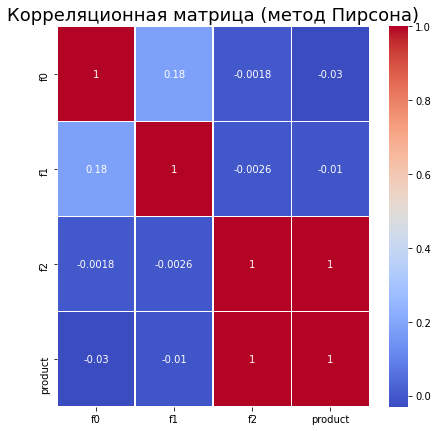

In [33]:
# Для наглядности используем ХитМэп:
df_corr_martix = data_one.corr()
plt.figure(figsize = (7, 7))
sns.heatmap(df_corr_martix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Корреляционная матрица (метод Пирсона)', fontsize = 18)
plt.show()

Во втором месторождении:\
Наблюдается **мультиколлинеарность** или же *полная положительная* корреляция между **объемом запасов** и **третьим признаком** точек **1**, что может негативно сказаться на прогнозе модели, так как представляет собой избыточность данных. Возможно столбец с этим признаком нужно не брать в моделирование ? \
А так же *слабая положительная* корреляция между **первым** и **вторым признаком** точек **0,18**.\
В остальном признаки ни между собой, ни с объемом запасов не коррелируют. 



Значит, наверное, трогать столбец с третьим признаком не стоит, так как признаков в принципе мало, да и корреляции никакие. 

1.4.3 Работаем с датафреймом `data_two`:

1. Вызовем описательную функцию для трех признаков точек скважин:

In [34]:
print(data_two['f0'].describe())
print(data_two['f1'].describe())
data_two['f2'].describe()

count    100000.000000
mean          0.002023
std           1.732045
min          -8.760004
25%          -1.162288
50%           0.009424
75%           1.158535
max           7.238262
Name: f0, dtype: float64
count    100000.000000
mean         -0.002081
std           1.730417
min          -7.084020
25%          -1.174820
50%          -0.009482
75%           1.163678
max           7.844801
Name: f1, dtype: float64


count    100000.000000
mean          2.495128
std           3.473445
min         -11.970335
25%           0.130359
50%           2.484236
75%           4.858794
max          16.739402
Name: f2, dtype: float64

Аномальных значений не обнаружено, данные аналогичны первому датафрейму.

2. Вызовем описательную функцию для `product`:

In [35]:
data_two['product'].describe()

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

Для оценки выбросов построим боксплот:

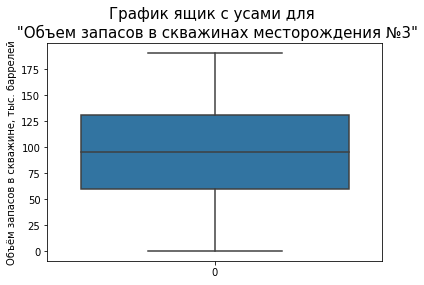

In [36]:
sns.boxplot(data = data_two['product'])
plt.title('График ящик с усами для \n "Объем запасов в скважинах месторождения №3"', size = 15)
plt.ylabel('Объём запасов в скважине, тыс. баррелей', size = 10)
plt.show()

Аномальных значений не обнаружено.\
Построим гистограмму распределения объёма запасов в скважинах второго месторождения:

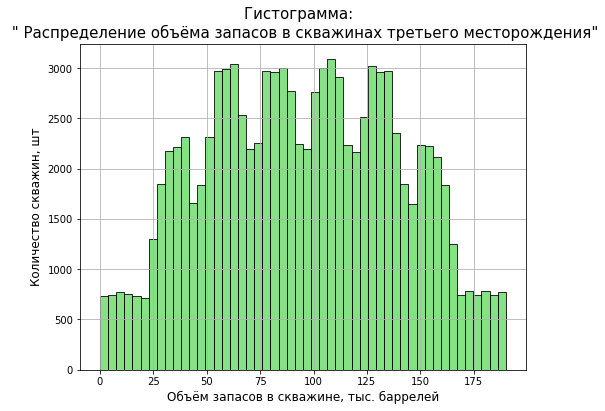

In [37]:
plt.figure(figsize = (8, 6))
sns.histplot(data_two, bins = 50,  
             x = 'product',
             color = 'limegreen', 
             alpha = 0.6)
plt.title('Гистограмма:  \n " Распределение объёма запасов в скважинах третьего месторождения"', size = 15)
plt.xlabel('Объём запасов в скважине, тыс. баррелей', size = 12)
plt.ylabel('Количество скважин, шт', size = 12)
plt.grid(True)
plt.show()

Из гистограммы выше видно, что распределение похоже на "многомодальное", как и на первом месторождении.\
Так же из описательной функции мы видим, что встречаются пустые скважины с объемом равным нулю, а так же средний объем запасов составляет **95 тыс.** баррелей нефти на скважину.

 Рассчитаем коэффициенты корреляции между всеми признаками:

In [38]:
# Так как столбец ID напрямую коррелирует с объемом запасов в скважине - сделаем его индексом, чтобы видеть в будущем какие скважины
# могут быть нам более интересными
data_two = data_two.set_index('id')

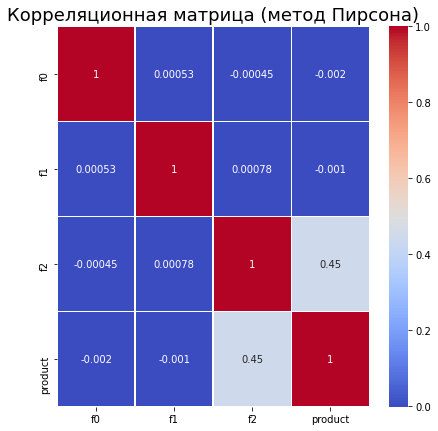

In [39]:
# Для наглядности используем ХитМэп:
df_corr_martix = data_two.corr()
plt.figure(figsize = (7, 7))
sns.heatmap(df_corr_martix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Корреляционная матрица (метод Пирсона)', fontsize = 18)
plt.show()

В третьем месторождении:\
Мультиколлинеарность отсутствует.\
Наблюдается *умеренная положительная* корреляция между **объемом запасов** и **третьим признаком** точек **0,45**. 

В остальном признаки ни между собой, ни с объемом запасов не коррелируют. 

### Вывод:
На этапе исследовательского анализа данных мы выяснили, что в значениях объемов запасов отсутсвуют выбросы, однако в данных по признакам точек выбросы есть и мы ничего с этим не можем поделать. \
А так же на основании корреляционного анализа трех месторождений можно сказать, что самое сильное влияние на целевой признак оказывает `f2` - признак третьей точки. 

### 1.5 Подготовка данных: 

Разделим данные со всех месторождений на обучающую и валидационную выборки в соотношении **75:25**. \
А так же проверим корректность разделения.

In [40]:
# Используемые константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

Первое месторождение:

In [41]:
X_zero = data_zero.drop(['product'], axis = 1)
y_zero = data_zero['product']

In [42]:
X_train_zero, X_valid_zero, y_train_zero, y_valid_zero = train_test_split(X_zero,
                                                      y_zero,
                                                      test_size = TEST_SIZE,
                                                      random_state = RANDOM_STATE)

In [43]:
scaler = StandardScaler()

In [44]:
X_train_zero = scaler.fit_transform(X_train_zero)
X_valid_zero = scaler.transform(X_valid_zero)

In [45]:
# Первое месторождение
print(f'Размер обучающей выборки {X_train_zero.shape}')
print(f'Размер тестовой выборки {X_valid_zero.shape}')

Размер обучающей выборки (75000, 3)
Размер тестовой выборки (25000, 3)


Второе месторождение:

In [46]:
X_one = data_one.drop(['product'], axis = 1)
y_one = data_one['product']

In [47]:
X_train_one, X_valid_one, y_train_one, y_valid_one = train_test_split(X_one,
                                                      y_one,
                                                      test_size = TEST_SIZE,
                                                      random_state = RANDOM_STATE)

In [48]:
X_train_one = scaler.fit_transform(X_train_one)
X_valid_one = scaler.transform(X_valid_one)

In [49]:
# Второе месторождение
print(f'Размер обучающей выборки {X_train_one.shape}')
print(f'Размер тестовой выборки {X_valid_one.shape}')

Размер обучающей выборки (75000, 3)
Размер тестовой выборки (25000, 3)


Третье месторождение:

In [50]:
X_two = data_two.drop(['product'], axis = 1)
y_two = data_two['product']

In [51]:
X_train_two, X_valid_two, y_train_two, y_valid_two = train_test_split(X_two,
                                                      y_two,
                                                      test_size = TEST_SIZE,
                                                      random_state = RANDOM_STATE)

In [52]:
X_train_two = scaler.fit_transform(X_train_two)
X_valid_two = scaler.transform(X_valid_two)

In [53]:
# Второе месторождение
print(f'Размер обучающей выборки {X_train_two.shape}')
print(f'Размер тестовой выборки {X_valid_two.shape}')

Размер обучающей выборки (75000, 3)
Размер тестовой выборки (25000, 3)


## Вывод по разделу:
1. На первом шаге мы **загрузили** и посмотрели данные:
- `data_zero` на **5** колонок и **100000** строк;
- `data_one` на **5** колонок и **100000** строк;
- `data_two` на **5** колонки и **100000** строк.\
Пропуски в данных отсутствуют.

2. На этапе **предобработки данных** проведена проверка на дубликаты. \
Мы не выявили явных дубликатов, однако были замечены одни и те же скважины с различными признаками точек. Принято решение не избавляться от этих данных, так как они обезличенны и их количество очень мало.

3. На этапе **исследовательского анализа** данных мы выяснили, что в значениях объемов запасов отсутсвуют выбросы, однако в данных по признакам точек выбросы есть и мы ничего с этим не можем поделать.\
А так же на основании корреляционного анализа трех месторождений можно сказать, что самое сильное влияние на целевой признак оказывает f2 - признак третьей точки.

4. На этапе **подготовки** - данные со всех месторождений разделены на обучающую и валидационную выборки в соотношении 75:25, а так же отмасштабированы.

## Шаг 2. Обучение и проверка моделей для каждого региона

Первое месторождение:

In [54]:
# список предсказаний по объёму сырья в скважине на валидационной выборке
predictions = []

In [55]:
# инициируем и обучаем модель
lr = LinearRegression()
model_zero = lr.fit(X_train_zero, y_train_zero)

In [56]:
# делаем предсказание на валидационной выборке
predictions = model_zero.predict(X_valid_zero)
predictions = pd.Series(predictions)

In [57]:
rmse = (mean_squared_error(predictions, y_valid_zero))**(0.5)
avr_product = sum(predictions) / len(predictions)

In [58]:
print("RMSE (корень среднеквадратичной ошибки), тыс. баррелей: {0:.2f}".format(rmse))
print("Средний предсказанный объем запасов, тыс. баррелей: {0:.2f}".format(avr_product))

RMSE (корень среднеквадратичной ошибки), тыс. баррелей: 37.76
Средний предсказанный объем запасов, тыс. баррелей: 92.40


- В среднем, наша модель ошибается на 37,76 тыс баррелей при среднем предсказанном объеме запасов в 92,4 тыс. баррелей. 

Второе месторождение:

In [59]:
# обучаем модель
model_one = lr.fit(X_train_one, y_train_one)

In [60]:
# список предсказаний по объёму сырья в скважине на валидационной выборке
predict = []

In [61]:
# делаем предсказание на валидационной выборке
predict = model_one.predict(X_valid_one)
predict = pd.Series(predict)

In [62]:
rmse = (mean_squared_error(predict, y_valid_one))**(0.5)
avr_product = sum(predict) / len(predict)

In [63]:
print("RMSE (корень среднеквадратичной ошибки), тыс. баррелей: {0:.2f}".format(rmse))
print("Средний предсказанный объем запасов, тыс. баррелей: {0:.2f}".format(avr_product))

RMSE (корень среднеквадратичной ошибки), тыс. баррелей: 0.89
Средний предсказанный объем запасов, тыс. баррелей: 68.71


- В среднем, наша модель ошибается на 0,89 тыс баррелей при среднем предсказанном объеме запасов в 68,71 тыс. баррелей. 
- Такое маленькое значение среднеквадратичной ошибки, естественно, связано с переобученностью модели, так как присутствует мультиколинеарность между входящим и целевым признаком. Однако даже при такой точности предсказанный объем запасов меньше, чем у первого месторождения.

Третье месторождение:

In [64]:
# обучаем модель
model_two = lr.fit(X_train_two, y_train_two)

In [65]:
# список предсказаний по объёму сырья в скважине на валидационной выборке
pred = []

In [66]:
# делаем предсказание на валидационной выборке
pred = model_two.predict(X_valid_two)
pred = pd.Series(pred)

In [67]:
rmse = (mean_squared_error(pred, y_valid_two))**(0.5)
avr_product = sum(pred) / len(pred)

In [68]:
print("RMSE (корень среднеквадратичной ошибки), тыс. баррелей: {0:.2f}".format(rmse))
print("Средний предсказанный объем запасов, тыс. баррелей: {0:.2f}".format(avr_product))

RMSE (корень среднеквадратичной ошибки), тыс. баррелей: 40.15
Средний предсказанный объем запасов, тыс. баррелей: 94.77


- В среднем, наша модель ошибается на 40,15 тыс баррелей при среднем предсказанном объеме запасов в 94,77 тыс. баррелей. 

## Вывод:
1. Созданы и обучены модели **LinearRegression** для каждого месторождения.
2. На валидационной выборке выполнены предсказания по объёму сырья в скважинах.
3. Рассчитаны значения среднего запаса предсказанного сырья и **RMSE** моделей:
- Наиболее оптимальным с точки зрения значения *среднеквадратичной ошибки*, тоесть уменьшения погрешности модели, является **первое месторождение**, тогда как по среднему *предсказанному объему запасов* приоритет отдается **третьему месторождению**. 

## Шаг 3 - Подготовка к расчету прибыли

### 3.1. Сохраним ключевые значения для расчётов в отдельных переменных

Условие:\
При разведке региона исследуют **500** точек, из которых с помощью машинного обучения выбирают **200** лучших для разработки.\
Бюджет на разработку скважин в регионе — **10** млрд рублей.\
Доход с каждой единицы продукта составляет **450** тыс. рублей, поскольку объём указан в тысячах баррелей.

In [69]:
# при разведке региона исследуют 500 точек:
point_mining = 500  

# выбранные 200 лучших точек для разработки:
best_mining = 200

# бюджет на разработку скважин в регионе — 10 млрд рублей:
budget = 10*10**9   

# Доход с каждой единицы продукта, руб:
price_1_product = 450*10**3   

### 3.2. Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе. 

In [70]:
print("Средний объем нефти, требуемый для безубыточной разработки новой скважины: {0:.0f} тыс. баррелей.". \
      format(budget / (price_1_product * best_mining)))

Средний объем нефти, требуемый для безубыточной разработки новой скважины: 111 тыс. баррелей.


Как мы помним, предсказанные средние запасы сырья в наших регионах составляют: 
1. Регион **1** - **92,4** тыс. баррелей;
2. Регион **2** - **68,71** тыс. баррелей;
3. Регион **3** - **94,77** тыс. баррелей.

- Среднее значение запаса сырья по всем скважинам для каждого из регионов меньше, чем точка безубыточности: **111** тыс. баррелей 

### Вывод:
На этапе подготовки к расчету прибыли, мы сохранили ключевые значения для расчётов в отдельных переменных, а так же рассчитали достаточный объём сырья для безубыточной разработки новой скважины.\
По результатам расчета стало известно, что среднее значение запаса сырья по всем скважинам для каждого из регионов меньше, чем точка безубыточности: **111** тыс. баррелей.\
Это говорит о том, что нам необходимо выбрать наиболее выгодные точки из каждого месторождения и разрабатывать их.

## Шаг 4 - Написание функции для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [71]:
# функция расчёта прибыли
def profit_calc(target, predictions, count):
    pred_sorted = predictions.sort_values(ascending = False)
    target_select = target[pred_sorted.index].iloc[:count]

    return target_select.sum() * price_1_product - budget

Рассчитаем прибыльность двухста лучших скважин на каждом месторождении: \
**Первое месторождение**:

In [72]:
print("Потенциальная прибыльность первого месторождения составляет:", \
      f"{profit_calc(y_valid_zero, predictions, best_mining)/1e9:,.1f} млрд".replace(",", " "))

Потенциальная прибыльность первого месторождения составляет: 3.4 млрд


**Второе месторождение**:

In [73]:
print("Потенциальная прибыльность второго месторождения составляет:", \
      f"{profit_calc(y_valid_one, predict, best_mining)/1e9:,.1f} млрд".replace(",", " "))

Потенциальная прибыльность второго месторождения составляет: 2.4 млрд


**Третье месторождение**:

In [74]:
print("Потенциальная прибыльность третьего месторождения составляет:", \
      f"{profit_calc(y_valid_two, pred, best_mining)/1e9:,.1f} млрд".replace(",", " "))

Потенциальная прибыльность третьего месторождения составляет: 2.6 млрд


### Вывод:
На данном этапе написана функция расчета прибыли по наиболее выгодным точкам месторождений.\
Расчеты показали, что разработка наиболее выгодных точек несет в себе большую прибыль, независимо от месторождения, хотя по факту разработка самого-самого не всегда доступна в реальных условиях и отражает "идеальную" картину производства, к которой нужно стремиться. 

## Шаг 5 - Расчет рисков и прибыли для каждого региона

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли:

In [75]:
state = np.random.RandomState(12345)

In [76]:
# функция бутстреп:
def bootstrap(target, valid, mining):
    values = []
    for i in range(1000):
        target_subsample = target.sample(n = mining, replace = True, random_state = state)
        probs_subsample = valid.loc[target_subsample.index]
        values.append(profit_calc(target_subsample, probs_subsample, best_mining))
        
    values = pd.Series(values)
    return values

**Первое месторождение** (средняя прибыль для 1000 различных вариантов разведки):

In [78]:
y_valid_zero = y_valid_zero.reset_index(drop = True) # сбросил индексы, т.к. до этого у меня там были id и выпадала ошибка
values_zero = bootstrap(y_valid_zero, predictions, point_mining)

mean_zero = values_zero.mean()
lower_zero = values_zero.quantile(0.025)
upper_zero = values_zero.quantile(0.975)
risk_zero = values_zero[values_zero < 0].count() / values_zero.count() * 100

print("Средняя выручка:", round(mean_zero, 2))
print("Доверительный интервал (95%):", [round(lower_zero, 2), round(upper_zero, 2)])
print("Риск получения убытков:", round(risk_zero, 2))

Средняя выручка: 411121793.73
Доверительный интервал (95%): [-114976051.83, 926546016.63]
Риск получения убытков: 6.5


**Второе месторождение** (средняя прибыль для 1000 различных вариантов разведки):

In [79]:
y_valid_one = y_valid_one.reset_index(drop = True) # сбросил индексы, т.к. до этого у меня там были id и выпадала ошибка
values_one = bootstrap(y_valid_one, predict, point_mining)

mean_one = values_one.mean()
lower_one = values_one.quantile(0.025)
upper_one = values_one.quantile(0.975)
risk_one = values_one[values_one < 0].count() / values_one.count() * 100

print("Средняя выручка:", round(mean_one, 2))
print("Доверительный интервал (95%):", [round(lower_one, 2), round(upper_one, 2)])
print("Риск получения убытков:", round(risk_one, 2))

Средняя выручка: 497932339.42
Доверительный интервал (95%): [88029218.98, 900786663.77]
Риск получения убытков: 1.3


**Третье месторождение** (средняя прибыль для 1000 различных вариантов разведки):

In [80]:
y_valid_two = y_valid_two.reset_index(drop = True) # сбросил индексы, т.к. до этого у меня там были id и выпадала ошибка
values_two = bootstrap(y_valid_two, pred, point_mining)

mean_two = values_two.mean()
lower_two = values_two.quantile(0.025)
upper_two = values_two.quantile(0.975)
risk_two = values_two[values_two < 0].count() / values_two.count() * 100

print("Средняя выручка:", round(mean_two, 2))
print("Доверительный интервал (95%):", [round(lower_two, 2), round(upper_two, 2)])
print("Риск получения убытков:", round(risk_two, 2))

Средняя выручка: 403523051.88
Доверительный интервал (95%): [-171947572.87, 934563092.7]
Риск получения убытков: 8.1


Для лучшего восприятия соберем всё в одну таблицу:

In [81]:
final_dict = {'Минимальная выручка':[lower_zero, lower_one, lower_two], 
              'Средняя выручка':[mean_zero, mean_one, mean_two],
              'Максимальна выручка':[upper_zero, upper_one, upper_two],
              'Риск убытков на 200 лучших скважин, %' : [risk_zero, risk_one, risk_two]}
index_data = ['Первое месторождение', 'Второе месторождение', 'Третье месторождение']
final_data = pd.DataFrame(data = final_dict, index = index_data)

In [82]:
new_format = ['Минимальная выручка', 'Средняя выручка', 'Максимальна выручка']

for col in new_format:
    final_data[col] = final_data[col].apply(lambda x: f"{x/1e6:,.1f} млн".replace(".", ","))

In [83]:
final_data

,Минимальная выручка,Средняя выручка,Максимальна выручка,"Риск убытков на 200 лучших скважин, %"
Первое месторождение,"-115,0 млн","411,1 млн","926,5 млн",6.5
Второе месторождение,"88,0 млн","497,9 млн","900,8 млн",1.3
Третье месторождение,"-171,9 млн","403,5 млн","934,6 млн",8.1


### Вывод:
По условию задачи: после оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%.\
Среди них выбирают регион с наибольшей средней прибылью.

В итоге по приемлимости *риска* у нас проходит **второе месторождение** с 1.3% риска, но мы помним, что на этом участке у нас была **переобученная модель**. Так что я бы с осторожностью относился к такому оптимистическому прогнозу. Лучше проконсультироваться со старшими коллегами. Так же и средняя выручка у нас прогнозируется здесь самая большая. 

Принимая во внимание недоверие ко второй модели, можем сказать что по *средней выручке* и *минимальным рискам* нам подходит **первое месторождение**. 

## ВЫВОД ПО ПРОЕКТУ:
В данном исследовании перед нами стояла задача разработать решение, которое позволит выбрать локацию в трех представленных регионах, для бурения новой скважины.\
А именно:\
  0.1 Построить модель для определения региона, где добыча принесёт наибольшую прибыль.\
  0.2 Проанализировать возможную прибыль и риски техникой Bootstrap.


1. На *первом* шаге мы **загрузили** и посмотрели данные:
- `data_zero` на **5** колонок и **100000** строк;
- `data_one` на **5** колонок и **100000** строк;
- `data_two` на **5** колонки и **100000** строк.\
Пропуски в данных отсутствуют.

1.1 На этапе **предобработки данных** проведена проверка на дубликаты. \
Мы не выявили явных дубликатов, однако были замечены одни и те же скважины с различными признаками точек. Принято решение не избавляться от этих данных, так как они обезличенны и их количество очень мало.

1.2 На этапе **исследовательского анализа** данных мы выяснили, что в значениях объемов запасов отсутсвуют выбросы, однако в данных по признакам точек выбросы есть и мы ничего с этим не можем поделать.\
А так же на основании корреляционного анализа трех месторождений можно сказать, что самое сильное влияние на целевой признак оказывает f2 - признак третьей точки.

1.3 На этапе **подготовки** - данные со всех месторождений разделены на обучающую и валидационную выборки в соотношении 75:25, а так же отмасштабированы.

2. На *втором* шаге:\
2.1 Созданы и обучены модели **LinearRegression** для каждого месторождения.\
2.2 На валидационной выборке выполнены предсказания по объёму сырья в скважинах.\
2.3 Рассчитаны значения среднего запаса предсказанного сырья и **RMSE** моделей:\
Наиболее оптимальным с точки зрения значения *среднеквадратичной ошибки*, тоесть уменьшения погрешности модели, является **первое** месторождение, тогда как по среднему предсказанному объему запасов приоритет отдается **третьему** месторождению.

3. На *третьем* шаге:\
Мы сохранили ключевые значения для расчётов в отдельных переменных, а так же рассчитали достаточный объём сырья для безубыточной разработки новой скважины.\
По результатам расчета стало известно, что среднее значение запаса сырья по всем скважинам для каждого из регионов меньше, чем точка безубыточности: **111 тыс. баррелей**.

4. На *четвертом* шаге:\
Написана функция расчета прибыли по наиболее выгодным точкам месторождений.\
Потенциальная прибыль месторождений:

| Регион   | Прибыль (млрд. руб) |
|----------|---------------------|
| Регион 1 | 3.4                 |
| Регион 2 | 2.4                 |
| Регион 3 | 2.6                 |


5. На *пятом* шаге:\
Произведен расчет рисков и прибыли для каждого региона:\
В итоге по приемлимости риска у нас проходит второе месторождение с **1%** риска, но мы помним, что на этом участке у нас была **переобученная* модель. Так что я бы с осторожностью относился к такому оптимистическому прогнозу. \
Принимая во внимание недоверие ко второй модели, можем сказать что по средней выручке и минимальным рискам нам подходит **первое месторождение**.